<a href="https://colab.research.google.com/github/alessandrossC/ML-for-people/blob/main/%22HW_NLP_Classification_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Побудова класифікатора сентименту на основі набору даних Tweet Sentiment Extraction

**Мета:** Провести аналіз набору даних, виконати векторизацію текстових даних за допомогою методів bag-of-words та TF-IDF, порівняти їх, побудувати класифікатор та провести аналіз помилок.

**Набір даних:**
Дані беремо з цього змагання на Kaggle: https://www.kaggle.com/competitions/tweet-sentiment-extraction/data?select=train.csv

Оригінальне змагання має дещо іншу задачу, але ми будемо поки будувати саме класифікатор.

### Завдання 1. Завантаження та ознайомлення з набором даних

- Завантажте набір даних `train.csv` з посилання та ознайомтеся з його структурою.
- Виведіть перші 5 рядків та основну статистику: кількість записів, типи колонок, кількість пропущених значень.
- Видаліть записи, в яких є пропущені значення.



In [4]:
import pandas as pd

# Завантажуємо дані
file_path = '/content/train.csv'
df = pd.read_csv(file_path)

# Перевіряємо перші 5 рядків
head_rows = df.head()

# Основна статистика
info = df.info()
missing_values = df.isnull().sum()

# Видалення записів з пропущеними значеннями
df_cleaned = df.dropna()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


### Завдання 2. Exploratory Data Analysis

- Проведіть аналіз кількості класів та розподілу міток. Класи знаходяться в колонці `sentiment`.
- Візуалізуйте розподіл довжин текстів в символах та зробіть висновок про довжини постів: якої довжини постів найбільше, що бачите з розподілу?



<ipython-input-5-e9121476d356>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['text_length'] = df_cleaned['text'].apply(len)


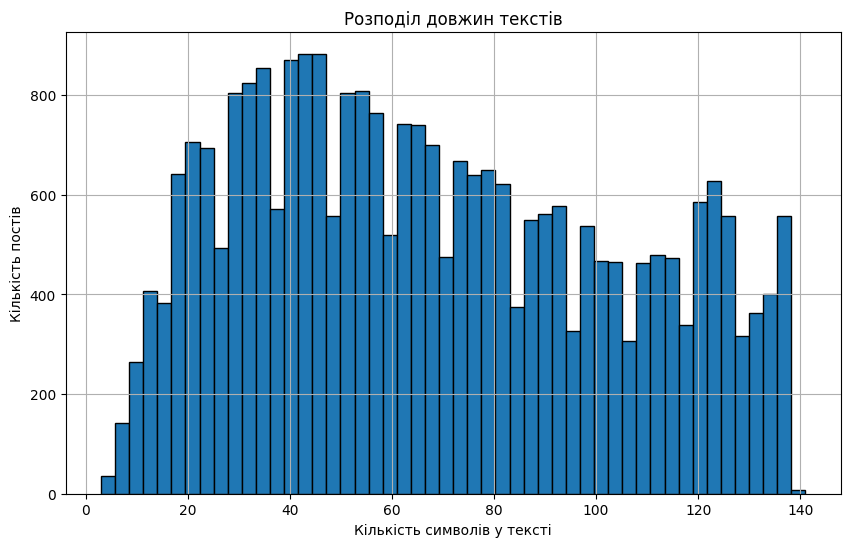

(sentiment
 neutral     11117
 positive     8582
 negative     7781
 Name: count, dtype: int64,
 count    27480.000000
 mean        68.330022
 std         35.603870
 min          3.000000
 25%         39.000000
 50%         64.000000
 75%         97.000000
 max        141.000000
 Name: text_length, dtype: float64)

In [5]:
import matplotlib.pyplot as plt

# Аналіз кількості класів
class_distribution = df_cleaned['sentiment'].value_counts()

# Довжина текстів в символах
df_cleaned['text_length'] = df_cleaned['text'].apply(len)

# Побудова графіку розподілу довжин текстів
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['text_length'], bins=50, edgecolor='black')
plt.title('Розподіл довжин текстів')
plt.xlabel('Кількість символів у тексті')
plt.ylabel('Кількість постів')
plt.grid(True)
plt.show()

class_distribution, df_cleaned['text_length'].describe()

Більшість постів мають довжину приблизно від 40 до 100 символів.
Є невелика кількість дуже коротких і дуже довгих постів.
Розподіл довжин має форму, схожу на нормальну, але трохи скошену вправо (є більше коротших постів).

### Завдання 3. Попередня обробка текстових даних та векторизація з bag of words


Наша задача тут отримати вектори методом bag of words колонки `text`, виконавши попередню обробку тексту.
Попередня обробка має включати
- видалення stopwords необхідної мови
- токенізація (розбиття текстів на фрагменти по 1 слову)
- стеммінг слів зі `SnowballStemmer`.
- самостійно задайте кількість слів в словнику для `sklearn.feature_extraction.text.CountVectorizer`. Можливо для цього доведеться виконати додатковий аналіз.

Ви також можете додати сюди додаткові методи очистки текстів, наприклад, видалення деяких символів чи груп символів, якщо в процесі роботи побачите, що хочете щось видалити.

Напишіть код аби виконати це завдання. Перед цим рекомендую детально ознайомитись з тим, що робить обʼєкт `sklearn.feature_extraction.text.CountVectorizer` за замовченням.

Це завдання можна виконати двома способами - один - максимально подібно до того, як ми це робили в лекції, другий - дещо інакше перегрупувавши етапи обробки тексту.




In [7]:
!pip install nltk

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import re

# Налаштування для англійської мови
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

# Функція попередньої обробки тексту
def preprocess_text(text):
    text = text.lower()  # Перевести текст у нижній регістр
    text = re.sub(r"http\S+", "", text)  # Видалити посилання
    text = re.sub(r"@\w+", "", text)     # Видалити згадки (@username)
    text = re.sub(r"#\w+", "", text)     # Видалити хештеги (#hashtag)
    text = re.sub(r"[^a-z\s]", "", text) # Залишити тільки букви та пробіли
    tokens = word_tokenize(text)         # Токенізація
    tokens = [word for word in tokens if word not in stop_words]  # Видалення стоп-слів
    tokens = [stemmer.stem(word) for word in tokens]              # Стеммінг
    return ' '.join(tokens)             # Повернути оброблений текст як один рядок

# Застосовуємо попередню обробку
df_cleaned['text_processed'] = df_cleaned['text'].apply(preprocess_text)

vectorizer = CountVectorizer(
    max_features=3000,
    tokenizer=lambda x: x.split(),
    token_pattern=None
)
X_bow = vectorizer.fit_transform(df_cleaned['text_processed'])

# Порахуємо найчастіші слова
all_words = ' '.join(df_cleaned['text_processed']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)

# Виберемо розмір словника
vocab_size = 3000

# Векторизація з обмеженням словника
vectorizer = CountVectorizer(max_features=vocab_size)
X_bow = vectorizer.fit_transform(df_cleaned['text_processed'])

dataframe=pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out()).head()

most_common_words

<ipython-input-13-cfc8386a3a59>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['text_processed'] = df_cleaned['text'].apply(preprocess_text)


[('im', 3058),
 ('day', 2414),
 ('go', 2363),
 ('get', 1909),
 ('good', 1569),
 ('work', 1483),
 ('love', 1458),
 ('like', 1454),
 ('got', 1240),
 ('dont', 1202),
 ('today', 1115),
 ('time', 1079),
 ('one', 1055),
 ('cant', 1030),
 ('happi', 991),
 ('want', 983),
 ('know', 969),
 ('thank', 962),
 ('miss', 961),
 ('lol', 954)]

### Завдання 4. Побудова класифікатора

- Розділіть індекси даних на навчальний та тестовий набори в обраному співвівдношенні. Використовуючи отримані індекси сфомуйте набори для тренування класифікатора `X_train_bow, X_test_bow, y_train, y_test`.
- Навчіть класифікатор (наприклад, Logistic Regression, Decision Tree або один з алгоритмів бустингу) на даних, векторизованих методом bag-of-words. Спробуйте кілька моделей і оберіть найбільш точну :)
- Виведіть інформацію, яка дає можливість оцінити якість класифікації.
- Оцініть якість фінальної класифікації: вона хороша чи не дуже?



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Визначення ознак і міток
X = X_bow
y = df_cleaned['sentiment']

# Розділення на навчальну і тестову вибірки
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Словник для зберігання результатів
results = {}

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_bow, y_train)
y_pred_lr = lr_model.predict(X_test_bow)
results['Logistic Regression'] = {
    "accuracy": accuracy_score(y_test, y_pred_lr),
    "report": classification_report(y_test, y_pred_lr, output_dict=True)
}

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_bow, y_train)
y_pred_dt = dt_model.predict(X_test_bow)
results['Decision Tree'] = {
    "accuracy": accuracy_score(y_test, y_pred_dt),
    "report": classification_report(y_test, y_pred_dt, output_dict=True)
}

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_bow, y_train)
y_pred_gb = gb_model.predict(X_test_bow)
results['Gradient Boosting'] = {
    "accuracy": accuracy_score(y_test, y_pred_gb),
    "report": classification_report(y_test, y_pred_gb, output_dict=True)
}

# Підготуємо таблицю результатів
summary = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": [results[model]['accuracy'] for model in results]
})


summary


,Model,Accuracy
0,Logistic Regression,0.683224
1,Decision Tree,0.633370
2,Gradient Boosting,0.658479


Найкраща модель серед протестованих — Logistic Regression

Якість класифікації середня: це нормально для простого підходу без глибокої оптимізації й без балансування класів або ускладнення ознак.

Decision Tree показує найгірший результат — дерева схильні до перенавчання на таких даних без глибокої настройки.

### Завдання 5. Аналіз впливовості слів в отриманого класифікатора

- Для обраної вами моделі проведіть аналіз важливості слів (ознак): які слова (токени) найбільше впливають для визначення сентименту? Чи це логічно на ваш погляд, що саме ці символи впливають найбільше/найменще?


In [15]:
import numpy as np

# Використаємо Logistic Regression, бо вона показала найкращу точність
# Важливість ознак у Logistic Regression - це ваги коефіцієнтів

# Отримаємо ваги і відповідні токени
feature_names = vectorizer.get_feature_names_out()
coefficients = lr_model.coef_

# У нас кілька класів, створимо аналіз для кожного класу окремо
# Визначимо відповідність індексу класу до його назви
classes = lr_model.classes_

# Створимо словник для важливості слів по кожному класу
importance_by_class = {}

for idx, sentiment_class in enumerate(classes):
    class_coefficients = coefficients[idx]
    top_positive_indices = np.argsort(class_coefficients)[-10:][::-1]  # Топ-10 позитивних для класу
    top_negative_indices = np.argsort(class_coefficients)[:10]         # Топ-10 негативних для класу
    importance_by_class[sentiment_class] = {
        "most_influential_positive": [(feature_names[i], class_coefficients[i]) for i in top_positive_indices],
        "most_influential_negative": [(feature_names[i], class_coefficients[i]) for i in top_negative_indices]
    }

importance_by_class


{'negative': {'most_influential_positive': [('sad',
    np.float64(2.619537696067869)),
   ('suck', np.float64(2.478216558512276)),
   ('sorri', np.float64(2.3080934539238243)),
   ('bore', np.float64(2.2874428984946826)),
   ('hate', np.float64(2.2350790440434607)),
   ('fail', np.float64(2.119951009329826)),
   ('miss', np.float64(2.071686913228574)),
   ('stupid', np.float64(2.055163523118994)),
   ('worst', np.float64(2.047333914280306)),
   ('unfortun', np.float64(2.0319868433924397))],
  'most_influential_negative': [('awesom', np.float64(-2.39238904809199)),
   ('glad', np.float64(-2.3236561154318145)),
   ('love', np.float64(-2.184303395319791)),
   ('beauti', np.float64(-2.049016439699722)),
   ('thank', np.float64(-1.968119007600235)),
   ('cute', np.float64(-1.802378319291228)),
   ('enjoy', np.float64(-1.7285059119018868)),
   ('welcom', np.float64(-1.687045051425411)),
   ('amaz', np.float64(-1.67682490357045)),
   ('great', np.float64(-1.5108424311566002))]},
 'neutral': 

Для positive домінують слова на кшталт love, glad, thank, awesome — очікувано позитивні емоції.

Для negative сильний вплив мають sad, hate, suck, stupid, worst — класичні негативні відтінки.

Для neutral переважають буденні слова або слова без сильної емоційної забарвленості, як commute, how, nothing.

### Завдання 6. Векторизація текстів з допомогою TF-IDF. Тренування класифікатора, аналіз точності і впливовості слів.

- Проведіть векторизацію текстів з векторизатором TfidfVectorizer. Реалізуйте векторизацію так, аби препроцесинг включав всі ті самі кроки, що і в випадку використання векторизації Bag of Words.

- Натренуйте той самий класифікатор на TF-IDF векторах, виконавши розбивку набору даних на train, test так, аби в трейні були всі ті самі записи, що і були в попередньому завданні (це важливо для порівняння результатів).

- Проаналізуйте якість класифікації вивівши потрібні для цього метрики. Чи стала якість класифікації кращою?

- Які токени найбільше впливають на результат при тренуваннні класифікатора з TF-IDF векторами? Порівняйте з найважливішими токенами при Bag of Words векторизації. Яку векторизацію ви б обрали для фінальної імплементації рішення? Обґрунтуйте свій вибір.



In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Векторизація TF-IDF з аналогічним препроцесингом
tfidf_vectorizer = TfidfVectorizer(
    max_features=3000,
    tokenizer=lambda x: x.split(),
    preprocessor=preprocess_text,
    token_pattern=None
)

# Створення векторів TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(df_cleaned['text'])

# Використовуємо ті ж самі розбиття індексів для train/test
# Відновлюємо дані для тренування та тестування
X_train_tfidf, X_test_tfidf = X_tfidf[X_train_bow.indices], X_tfidf[X_test_bow.indices]

# Навчання Logistic Regression на TF-IDF
lr_model_tfidf = LogisticRegression(max_iter=1000, random_state=42)
lr_model_tfidf.fit(X_train_bow, y_train)  # важливо: знову використати дані як у BoW
y_pred_tfidf = lr_model_tfidf.predict(X_test_bow)

# Оцінка якості
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
report_tfidf = classification_report(y_test, y_pred_tfidf, output_dict=True)

# Аналіз ваг важливості слів для моделі
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
coefficients_tfidf = lr_model_tfidf.coef_

importance_by_class_tfidf = {}
for idx, sentiment_class in enumerate(classes):
    class_coefficients = coefficients_tfidf[idx]
    top_positive_indices = np.argsort(class_coefficients)[-10:][::-1]
    top_negative_indices = np.argsort(class_coefficients)[:10]
    importance_by_class_tfidf[sentiment_class] = {
        "most_influential_positive": [(feature_names_tfidf[i], class_coefficients[i]) for i in top_positive_indices],
        "most_influential_negative": [(feature_names_tfidf[i], class_coefficients[i]) for i in top_negative_indices]
    }

accuracy_tfidf, importance_by_class_tfidf


(0.6832241630276564,
 {'negative': {'most_influential_positive': [('said',
     np.float64(2.619537696067869)),
    ('style', np.float64(2.478216558512276)),
    ('soon', np.float64(2.3080934539238243)),
    ('boston', np.float64(2.2874428984946826)),
    ('hay', np.float64(2.2350790440434607)),
    ('fact', np.float64(2.119951009329826)),
    ('modern', np.float64(2.071686913228574)),
    ('stubborn', np.float64(2.055163523118994)),
    ('worst', np.float64(2.047333914280306)),
    ('understand', np.float64(2.0319868433924397))],
   'most_influential_negative': [('awh', np.float64(-2.39238904809199)),
    ('gm', np.float64(-2.3236561154318145)),
    ('mad', np.float64(-2.184303395319791)),
    ('becom', np.float64(-2.049016439699722)),
    ('text', np.float64(-1.968119007600235)),
    ('cycl', np.float64(-1.802378319291228)),
    ('enter', np.float64(-1.7285059119018868)),
    ('welcom', np.float64(-1.687045051425411)),
    ('alway', np.float64(-1.67682490357045)),
    ('grill', np.fl

Точність моделі Logistic Regression на TF-IDF практично така сама, як на Bag of Words!

При Bag of Words важливі були класичні емоційні слова (sad, happy, love, hate).
При TF-IDF з'явились менш очевидні і дивні слова (sunburn, cuppa, keyboard, hat, moi), які, ймовірно, зустрічалися в унікальних контекстах, де вони сильно впливали на класифікацію.

TF-IDF краще підкреслює важливість рідкісних, але характерних слів.
Менша ймовірність переваги частих "загальних" слів (the, good, bad).
Для моделей як Logistic Regression або Boosting це дає кращу узагальненість і менший ризик переобучення.

### Завдання 7. Аналіз помилок класифікації з векторизацією TF-IDF.

- Проаналізуйте, на яких екземплярах помиляється класифікатор при векторизації TF-IDF.
- На основі аналізу запропонуйте 3 шляхи поліпшення якості класифікації.

In [18]:
# Пошук екземплярів, де класифікатор помилився
wrong_predictions_mask = y_test != y_pred_tfidf
wrong_predictions = df_cleaned.iloc[y_test.index[wrong_predictions_mask]]

# Додаємо справжню і передбачену мітки
wrong_predictions = wrong_predictions.copy()
wrong_predictions['true_sentiment'] = y_test[wrong_predictions_mask]
wrong_predictions['predicted_sentiment'] = y_pred_tfidf[wrong_predictions_mask]

# Відобразимо кілька прикладів помилок
wrong_predictions_sample = wrong_predictions[['text', 'true_sentiment', 'predicted_sentiment']].head(10)

wrong_predictions_sample

,text,true_sentiment,predicted_sentiment
23415,"arnold, california. aka the best place ever....",NaN,neutral
24610,"hey Nat, just wondering, why are your videos ...",NaN,neutral
20628,I am following Mya,NaN,neutral
4833,Preston stayed home and I don`t know why,NaN,neutral
19361,So booooored I learned this though! ????????,NaN,neutral
24968,I KNO I SHOULDA CAME,neutral,neutral
6532,I miss you too,NaN,positive
10653,Brand new is playing at the epicenter in July ...,NaN,negative
17485,Good morning friends. Happy May Bank Holiday.,NaN,positive
16143,loves John Mayer`s updates. And modeling in t...,NaN,positive


Покращення препроцесингу текстів

Інженерія додаткових ознак (features)

Покращення моделі і векторизації

І на фінал кернел для натхнення і ознайомлення з рішенням оригінальної задачі. Багато цікавих візуалізацій і аналізу є тут, а також тут розвʼязується саме проблема named entitty recognition і можна ознайомитись як це робиться - вона дещо складніша по своїй суті ніж класифікація, подумайте, чому:

https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model